<a href="https://colab.research.google.com/github/darshannayak21/pds/blob/main/exp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the context of Python for Data Science (PDS), outliers are data points that differ significantly from other observations in a dataset. They lie far outside the overall pattern and can be caused by variability in the data, measurement errors, or rare events.

Common Methods to Identify Outliers

Statistical Methods

Z-Score Method: A data point is considered an outlier if its z-score (standard deviations away from the mean) is greater than 3 or less than -3.
formula: zscore = (value - mean) / standard deviation.

IQR Method: Using the interquartile range:Use the IQR= Q3 - Q1 formula to calculate the outlier.
Outliers are data points below Q1 - 1.5 × IQR or above Q3 + 1.5 × IQR. Can use data points below Q1 - 2 * IQR or above Q3 + 2 * IQR (for less stricter outlier). specify lower_bound and upper_bound . formula : IQR = (Q3 - Q1)

Visualization: 1)Box plots. 2)Scatter plots 3x).Distribution plots (e.g., histograms, KDE plots)

Implementing outliers using IQR method (interquartile method)

QR (Interquartile Range) is a measure of statistical dispersion, or in simpler terms, how spread out the values in a dataset are. It is the range between the 25th percentile (Q1) and the 75th percentile (Q3), and it represents the middle 50% of the data.

formula: IQR = (Q3- Q1)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB

Describe:
         longitude    latitude  housing_median_age   total_rooms  \
count  3000.000000  3000.00000         3000.000000   3000.000000   
mean   -119.589200    35.63539           28.845333   2599.578667   
std       1.994936     2.12967           12.555396   2155.593332   
min    -124.180000    32

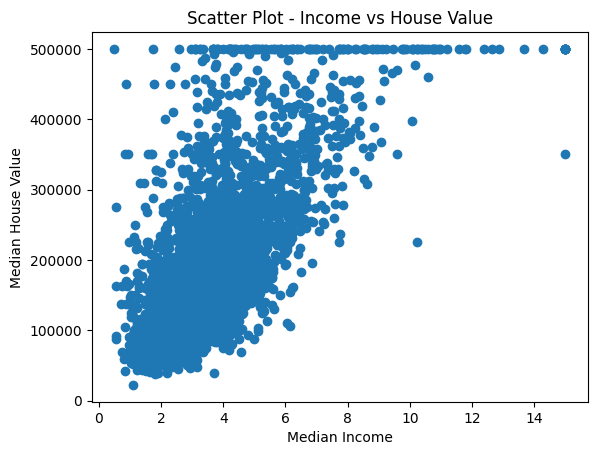

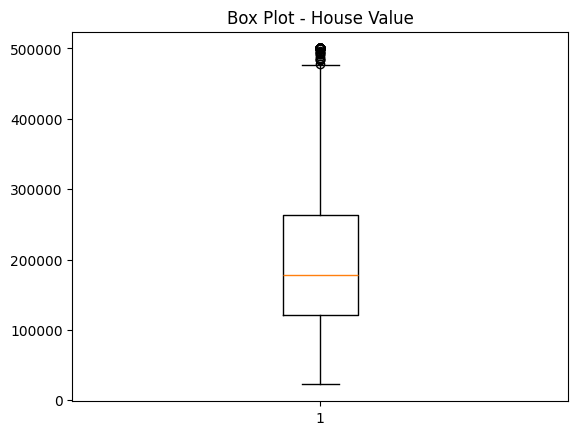

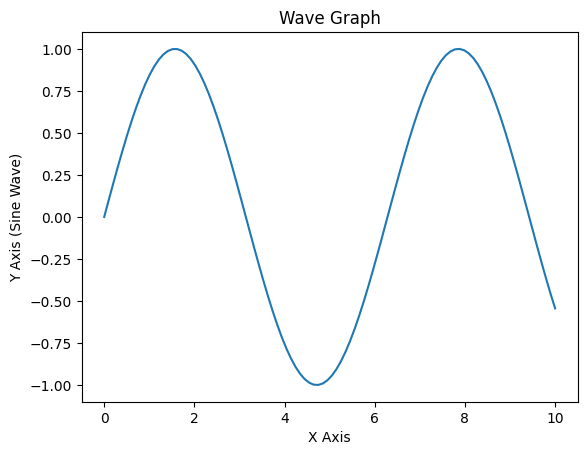


Skewness of numerical columns:
longitude            -0.297858
latitude              0.459816
housing_median_age    0.018513
total_rooms           4.167637
total_bedrooms        3.863393
population            2.949671
households            3.559753
median_income         1.698512
median_house_value    0.989562
dtype: float64
Outliers:
Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value]
Index: []


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Loading datasets

dataset1 = pd.read_csv("/content/sample_data/california_housing_test.csv")
dataset2 = pd.read_csv("/content/sample_data/california_housing_train.csv")

# Concatenating datasets
conc_data = pd.concat([dataset1, dataset2])

# Handling Missing Data: Dropping rows with missing values
dataset1.dropna()

# General Information about the dataset
print("Info:")
dataset1.info()

# Statistical Summary
print("\nDescribe:")
print(dataset1.describe())

# Checking for missing values
print("\nIS NULL any:")
print(dataset1.isnull().any())

print("\nMissing values per column:")
print(dataset1.isnull().sum())

# Checking for duplicated rows
print("\nDuplicated rows:")
print(dataset1.duplicated())

# Dropping duplicated rows
print("\nDrop Duplicates:")
dataset1.drop_duplicates(inplace=True)

# Display after removing duplicates
print("\nDataset after dropping duplicates:")
print(dataset1.head())

# Visualizations with Matplotlib
# Scatter Plot
plt.scatter(dataset1['median_income'], dataset1['median_house_value'])
plt.title('Scatter Plot - Income vs House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()


# Box Plot - To detect outliers in 'median_house_value'
plt.boxplot(dataset1['median_house_value'])
plt.title('Box Plot - House Value')
plt.show()

# Wave Graph (Uniform Curve) - Example using sine wave
x = np.linspace(0, 10, 100)
y = np.sin(x)
plt.plot(x, y)
plt.title('Wave Graph')
plt.xlabel('X Axis')
plt.ylabel('Y Axis (Sine Wave)')
plt.show()

# Handling Skewness
print("\nSkewness of numerical columns:")
print(dataset1.skew())

# Outlier Detection using IQR (Interquartile Range)
Q1 = dataset1['median_house_value'].quantile(0.25)
Q3 = dataset1['median_house_value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 2* IQR
upper_bound = Q3 + 2 * IQR

outliers = dataset1[(dataset1["median_house_value"]< lower_bound) | (dataset1["median_house_value"]> upper_bound)]
print("Outliers:")
print(outliers)
